# **Data Analysys project intro**

In [3]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

my_dataset = load_dataset('lukebarousse/data_jobs')
df = my_dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\Andrzej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Filter for US Data Analyst roles

In [5]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
df_DA_US.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"


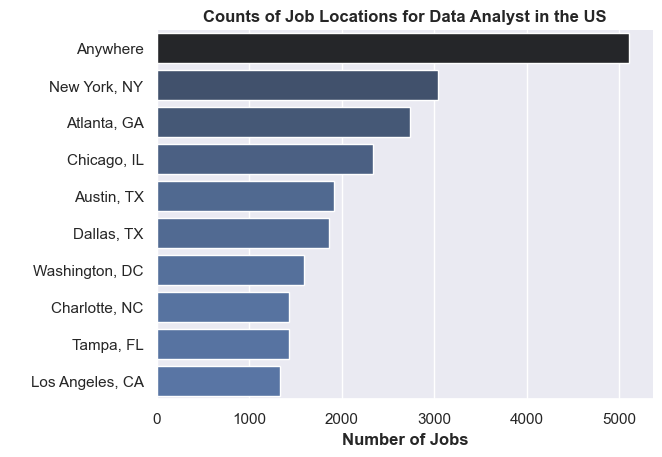

In [20]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

# plotting
sns.set_theme(style='darkgrid')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Counts of Job Locations for Data Analyst in the US", fontweight='bold')
plt.xlabel("Number of Jobs", fontweight='bold')
plt.ylabel(" ")
plt.show()

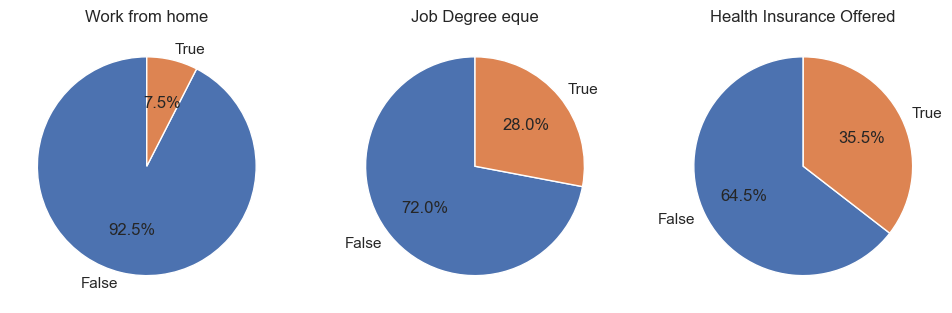

In [22]:
dict_column= {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job Degree eque',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

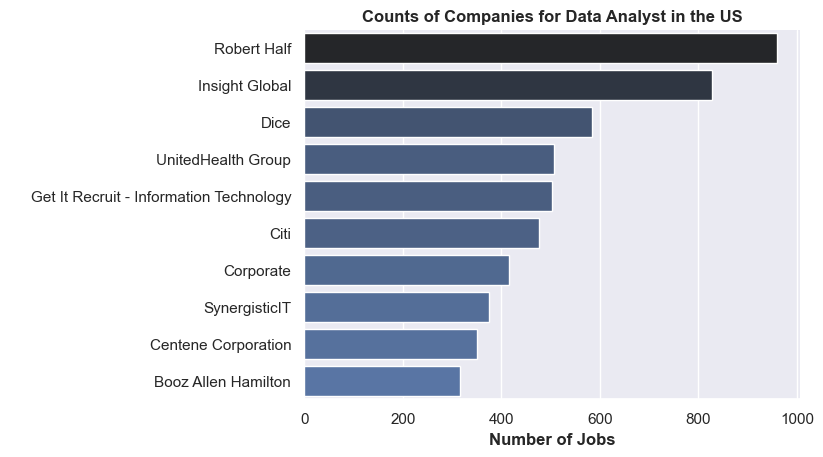

In [23]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

# plotting
sns.set_theme(style='darkgrid')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Counts of Companies for Data Analyst in the US", fontweight='bold')
plt.xlabel("Number of Jobs", fontweight='bold')
plt.ylabel(" ")
plt.show()

## `Addition`: **Filter for PL Data Analyst Jobs**

In [26]:
df_DA_PL = df[(df['job_country'] == 'Poland') & (df['job_title_short'] == 'Data Analyst')]
df_DA_PL.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
584,Data Analyst,Data Quality Analyst,"Kraków, Poland",via LinkedIn,Full-time,False,Poland,2023-02-16 13:24:23,False,False,Poland,None,NaN,NaN,Dyson,"[sap, excel, word]","{'analyst_tools': ['sap', 'excel', 'word']}"


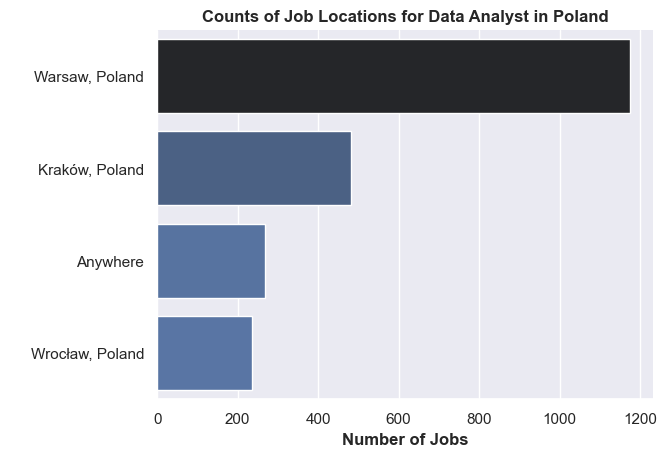

In [32]:
df_PL_plot = df_DA_PL['job_location'].value_counts().head(4).to_frame()

# plotting
sns.set_theme(style='darkgrid')
sns.barplot(data=df_PL_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title("Counts of Job Locations for Data Analyst in Poland", fontweight='bold')
plt.xlabel("Number of Jobs", fontweight='bold')
plt.ylabel(" ")
plt.show()

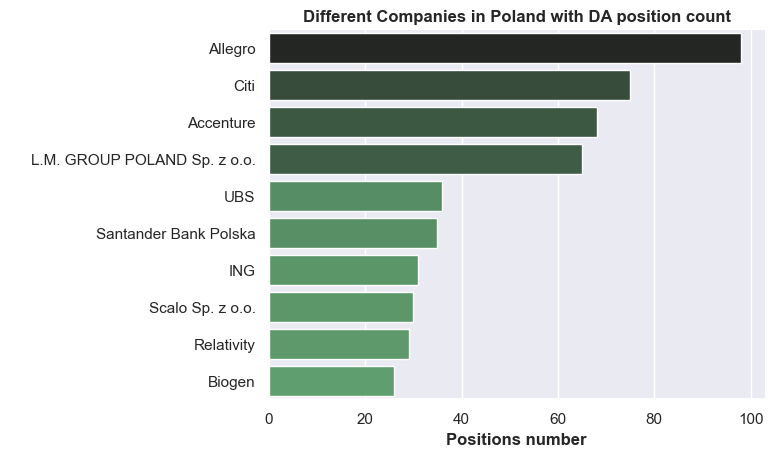

In [35]:
df_PL_plot2 = df_DA_PL['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='darkgrid')
sns.barplot(data=df_PL_plot2, x='count', y='company_name', hue='count', palette='dark:g_r', legend=False)
sns.despine()
plt.title("Different Companies in Poland with DA position count", fontweight='bold')
plt.xlabel("Positions number", fontweight='bold')
plt.ylabel(" ")
plt.show()

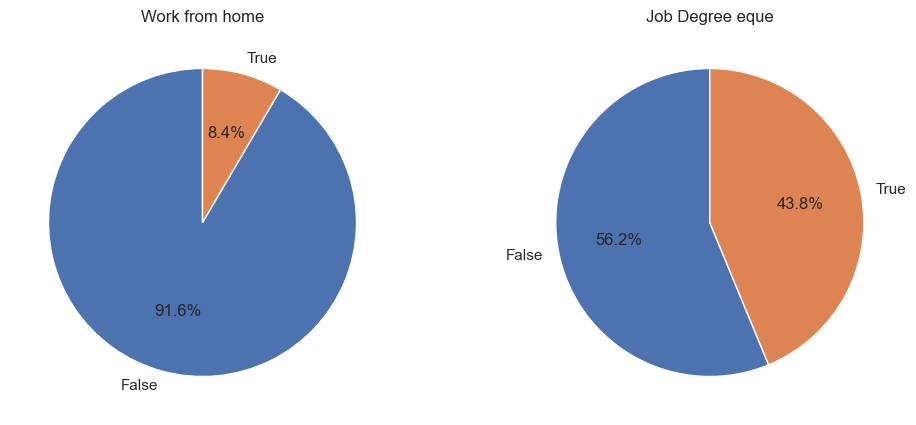

In [41]:
dict_column= {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job Degree eque'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_PL[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()